# **Software Defect Predection**

* ***importing required libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import friedmanchisquare
from scipy import stats
import seaborn as sns

## **Utility functions**

In [ ]:

import warnings
warnings.filterwarnings('ignore')



def plot_roc_curve(fpr,tpr):
  """
  plot roc curve using fpr and tpr

  """
  plt.plot(fpr,tpr,color="r",label="ROC curve")
  plt.plot([0,1],[0,1],color="b",label="Guessing Line")
  plt.xlabel("False Positve Rate")
  plt.ylabel("True Postive Rate")
  plt.legend()
  plt.show()

 
def RocCurve(x_test,y_test,model):
   """ make roc curve """
   y_probs=model.predict_proba(x_test)
    
   y_probs_positve=y_probs[:,1]

   fpr,tpr,threshold=roc_curve(y_test,y_probs_positve)

   

   return [fpr,tpr]
   



def ConfusionMatrix(y_test,y_preds):
   """ make confusion matrix """

   confusin_matrix=confusion_matrix(y_test,y_preds)

   print(pd.crosstab(y_test,y_preds,rownames=["Actual"],colnames=["Predicted"]))
   print("\n")

def classificationReport(y_test,y_preds):
   """ make classification report """

   print(classification_report(y_test,y_preds))
   print("\n")



def calPerformance(y_test,y_preds,model):
  d=dict()
  

  y_probs=model.predict_proba(x_test)  
  y_probs_positve=y_probs[:,1]

  d["accuracy"]=accuracy_score(y_test,y_preds)
  # d["precision"]=precision_score(y_preds,y_test)
  # d["recall"]=recall_score(y_test,y_preds)
  # d["f1"]=f1_score(y_test,y_preds)
  d["cross_val_score"]=round(np.mean(cross_val_score(model,x,y,cv=10)),3)
  d["roc_score"]=round(roc_auc_score(y_test,y_probs_positve),3)

  return d   

In [ ]:
accuracy_data=[]
roc_data=[]

## **CM1 Dataset**

In [ ]:


np.random.seed(42)

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv files/filtered_cm1.csv")

# removing outliers
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]


# feature selection based on correaltion
corr = df.corr()
# sns.heatmap(corr)

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
software_data = df[selected_columns]


# split dataset
x=software_data.drop("target",axis=1)
y=software_data["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# model used
clf=RandomForestClassifier(max_depth=10,max_features="auto",min_samples_leaf=6,min_samples_split=5,n_estimators=500)
svc=CalibratedClassifierCV(LinearSVC())
nb=GaussianNB(priors=None, var_smoothing=1.0)
dt=DecisionTreeClassifier(max_depth=5,max_features='auto',min_samples_leaf=10,min_samples_split=15)


# fit data to model
clf.fit(x_train,y_train)
svc.fit(x_train,y_train)
nb.fit(x_train,y_train)
dt.fit(x_train,y_train)




# prediction for model
y_preds_svc=svc.predict(x_test)
y_preds_nb=nb.predict(x_test)
y_preds_clf=clf.predict(x_test)
y_preds_dt=c=dt.predict(x_test)

results=[]

# performance and validation

results.append(calPerformance(y_test,y_preds_svc,svc))
results.append(calPerformance(y_test,y_preds_nb,nb))
results.append(calPerformance(y_test,y_preds_dt,dt))
results.append(calPerformance(y_test,y_preds_clf,clf))

cm_svc_rate=RocCurve(x_test,y_test,svc)
cm_nb_rate=RocCurve(x_test,y_test,nb)
cm_dt_rate=RocCurve(x_test,y_test,dt)
cm_clf_rate=RocCurve(x_test,y_test,clf)


cm_df=pd.DataFrame(results,index=["LinearSVC","Naive Bayes","Decision Tree","RandomForestClassifier"])
cm_df=cm_df.T
cm_df




,LinearSVC,Naive Bayes,Decision Tree,RandomForestClassifier
accuracy,0.807018,0.807018,0.807018,0.807018
cross_val_score,0.881000,0.884000,0.877000,0.884000
roc_score,0.439000,0.854000,0.440000,0.761000


In [ ]:
CM_accuracy=np.array(cm_df.iloc[1]).tolist()
CM_roc=np.array(cm_df.iloc[2]).tolist()

accuracy_data.append(CM_accuracy)
roc_data.append(CM_roc)


## **JM1 Dataset**

In [ ]:


np.random.seed(42)

software_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv files/filtered_jm1.csv")

# split dataset
x=software_data.drop("target",axis=1)
y=software_data["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# model used
clf=RandomForestClassifier()
svc=CalibratedClassifierCV(LinearSVC())
nb=GaussianNB()
dt=DecisionTreeClassifier()


# fit data to model
clf.fit(x_train,y_train)
svc.fit(x_train,y_train)
nb.fit(x_train,y_train)
dt.fit(x_train,y_train)




# prediction for model
y_preds_svc=svc.predict(x_test)
y_preds_nb=nb.predict(x_test)
y_preds_clf=clf.predict(x_test)
y_preds_dt=c=dt.predict(x_test)

results=[]

# performance and validation


results.append(calPerformance(y_test,y_preds_svc,svc))
results.append(calPerformance(y_test,y_preds_nb,nb))
results.append(calPerformance(y_test,y_preds_dt,dt))
results.append(calPerformance(y_test,y_preds_clf,clf))


jm_svc_rate=RocCurve(x_test,y_test,svc)
jm_nb_rate=RocCurve(x_test,y_test,nb)
jm_dt_rate=RocCurve(x_test,y_test,dt)
jm_clf_rate=RocCurve(x_test,y_test,clf)

jm_df=pd.DataFrame(results,index=["LinearSVC","Naive Bayes","Decision Tree","RandomForestClassifier"])
jm_df=jm_df.T
jm_df




,LinearSVC,Naive Bayes,Decision Tree,RandomForestClassifier
accuracy,0.808824,0.805147,0.742647,0.8125
cross_val_score,0.809000,0.804000,0.717000,0.7940
roc_score,0.630000,0.631000,0.574000,0.7260


In [ ]:
JM_accuracy=np.array(jm_df.iloc[1]).tolist()
JM_roc=np.array(jm_df.iloc[2]).tolist()

accuracy_data.append(JM_accuracy)
roc_data.append(JM_roc)


## **PC5 Dataset**

In [ ]:


np.random.seed(42)

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv files/filtered_pc5.csv")

# removing outliers
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]


# feature selection based on correaltion
corr = df.corr()
# sns.heatmap(corr)

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
software_data = df[selected_columns]


# split dataset
x=software_data.drop("target",axis=1)
y=software_data["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# model used
clf=RandomForestClassifier(max_depth=20,max_features="sqrt",min_samples_leaf=6,min_samples_split=5,n_estimators=1000)
svc=CalibratedClassifierCV(LinearSVC())
nb=GaussianNB(priors=None, var_smoothing=1.0)
dt=DecisionTreeClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=6,min_samples_split=20)


# fit data to model
clf.fit(x_train,y_train)
svc.fit(x_train,y_train)
nb.fit(x_train,y_train)
dt.fit(x_train,y_train)




# prediction for model
y_preds_svc=svc.predict(x_test)
y_preds_nb=nb.predict(x_test)
y_preds_clf=clf.predict(x_test)
y_preds_dt=c=dt.predict(x_test)

results=[]

# performance and validation


results.append(calPerformance(y_test,y_preds_svc,svc))
results.append(calPerformance(y_test,y_preds_nb,nb))
results.append(calPerformance(y_test,y_preds_dt,dt))
results.append(calPerformance(y_test,y_preds_clf,clf))


pc_svc_rate=RocCurve(x_test,y_test,svc)
pc_nb_rate=RocCurve(x_test,y_test,nb)
pc_dt_rate=RocCurve(x_test,y_test,dt)
pc_clf_rate=RocCurve(x_test,y_test,clf)

pc_df=pd.DataFrame(results,index=["LinearSVC","Naive Bayes","Decision Tree","RandomForestClassifier"])
pc_df=pc_df.T
pc_df




,LinearSVC,Naive Bayes,Decision Tree,RandomForestClassifier
accuracy,0.777311,0.785714,0.756303,0.819328
cross_val_score,0.751000,0.753000,0.742000,0.787000
roc_score,0.619000,0.674000,0.679000,0.812000


In [ ]:
PC5_accuracy=np.array(pc_df.iloc[1]).tolist()
PC5_roc=np.array(pc_df.iloc[2]).tolist()

accuracy_data.append(PC5_accuracy)
roc_data.append(PC5_roc)


## **statistical test**

In [ ]:
accuracy_data

[[0.881, 0.884, 0.877, 0.884],
 [0.809, 0.804, 0.717, 0.794],
 [0.751, 0.753, 0.742, 0.787]]

In [ ]:
acc_table=pd.DataFrame(accuracy_data,index=["CM1","JM1","PC5"],columns=["LinearSVC","Naive Bayes","Decision Tree","RandomForestClassifier"])
print("Accuracy table")

acc_table

Accuracy table


,LinearSVC,Naive Bayes,Decision Tree,RandomForestClassifier
CM1,0.881,0.884,0.877,0.884
JM1,0.809,0.804,0.717,0.794
PC5,0.751,0.753,0.742,0.787


* Null Hypothesis : there is no differences between all models.
* Alternative Hypothesis : there is significant difference between models.

In [ ]:

f_test=friedmanchisquare(acc_table["LinearSVC"],acc_table["Naive Bayes"],
                         acc_table["Decision Tree"],acc_table["RandomForestClassifier"])
print(f_test)

FriedmanchisquareResult(statistic=5.896551724137934, pvalue=0.11675312352287351)


* *As the p-value is greater than threshold(alpha=0.05) it's significance is less than 95%*

* *Now this test is followed by Post Test by Wilcoxon signed rank tests*

In [ ]:
stats.wilcoxon(acc_table["LinearSVC"],acc_table["Naive Bayes"])

WilcoxonResult(statistic=3.0, pvalue=1.0)

In [ ]:
stats.wilcoxon(acc_table["LinearSVC"],acc_table["Decision Tree"])

WilcoxonResult(statistic=0.0, pvalue=0.10880943004054568)

In [ ]:
stats.wilcoxon(acc_table["LinearSVC"],acc_table["RandomForestClassifier"])

WilcoxonResult(statistic=2.0, pvalue=0.5929800980174267)

In [ ]:
stats.wilcoxon(acc_table["Decision Tree"],acc_table["Naive Bayes"])

WilcoxonResult(statistic=0.0, pvalue=0.10880943004054568)

In [ ]:
stats.wilcoxon(acc_table["Decision Tree"],acc_table["RandomForestClassifier"])

WilcoxonResult(statistic=0.0, pvalue=0.10880943004054568)

In [ ]:
stats.wilcoxon(acc_table["RandomForestClassifier"],acc_table["Naive Bayes"])

WilcoxonResult(statistic=1.0, pvalue=0.6547208460185769)

## **plot**

In [ ]:
acc_table

,CM1,JM1,PC5
LinearSVC,0.881,0.809,0.751
Navie Bayes,0.884,0.804,0.753
Decision Tree,0.877,0.717,0.742
RandomForestClassifier,0.884,0.794,0.787


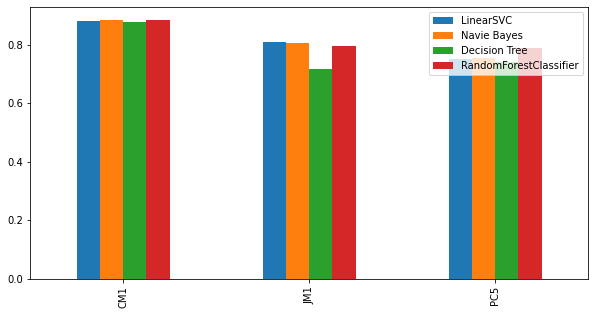

In [ ]:
acc_table.T.plot.bar(figsize=(10,5))

*LinearSVC model has highest accuracy followed by Random Forest Classifier*

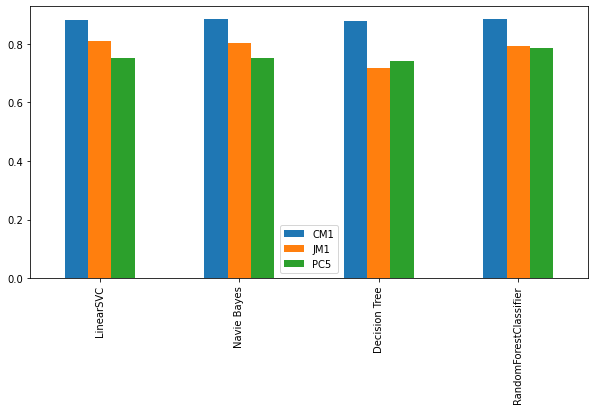

In [ ]:
acc_table.plot.bar(figsize=(10,5))

*CM1 has highest accuracy over all models*

In [ ]:
roc_data

[[0.439, 0.854, 0.44, 0.761],
 [0.63, 0.631, 0.574, 0.726],
 [0.619, 0.674, 0.679, 0.812]]

In [ ]:
roc_table=pd.DataFrame(roc_data,index=["CM1","JM1","PC5"],columns=["LinearSVC","Naive Bayes","Decision Tree","RandomForestClassifier"])
print("ROC table")
roc_table

ROC table


,LinearSVC,Naive Bayes,Decision Tree,RandomForestClassifier
CM1,0.439,0.854,0.440,0.761
JM1,0.630,0.631,0.574,0.726
PC5,0.619,0.674,0.679,0.812


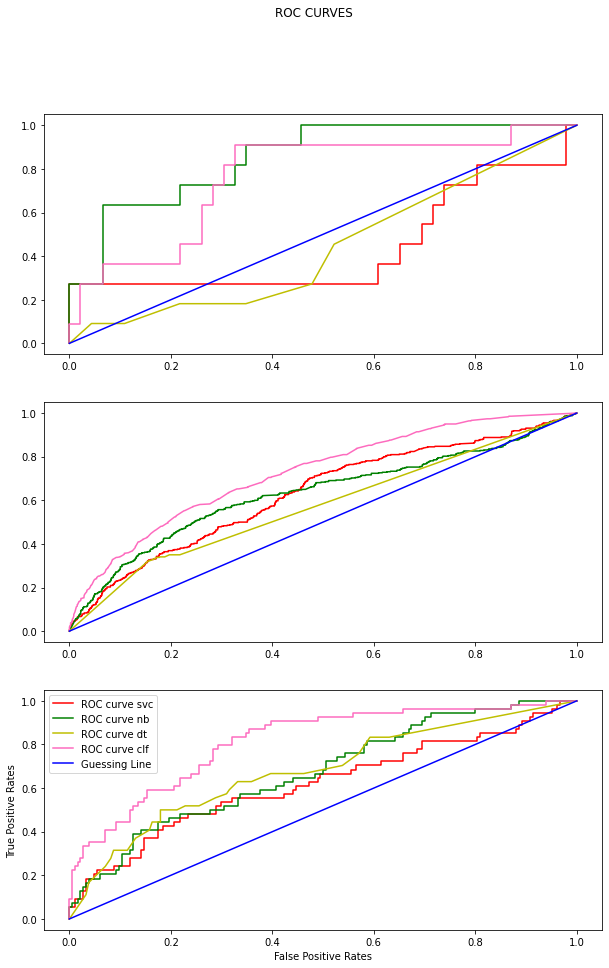

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(10,15))


ax1.plot(cm_svc_rate[0],cm_svc_rate[1],color="r",label="ROC curve svc")
ax1.plot(cm_nb_rate[0],cm_nb_rate[1],color="g",label="ROC curve nb")
ax1.plot(cm_dt_rate[0],cm_dt_rate[1],color="y",label="ROC curve dt")
ax1.plot(cm_clf_rate[0],cm_clf_rate[1],color="#fd6bbe",label="ROC curve clf")
ax1.plot([0,1],[0,1],color="b",label="Guessing Line")



ax2.plot(jm_svc_rate[0],jm_svc_rate[1],color="r",label="ROC curve svc")
ax2.plot(jm_nb_rate[0],jm_nb_rate[1],color="g",label="ROC curve nb")
ax2.plot(jm_dt_rate[0],jm_dt_rate[1],color="y",label="ROC curve dt")
ax2.plot(jm_clf_rate[0],jm_clf_rate[1],color="#fd6bbe",label="ROC curve clf")
ax2.plot([0,1],[0,1],color="b",label="Guessing Line")


ax3.plot(pc_svc_rate[0],pc_svc_rate[1],color="r",label="ROC curve svc")
ax3.plot(pc_nb_rate[0],pc_nb_rate[1],color="g",label="ROC curve nb")
ax3.plot(pc_dt_rate[0],pc_dt_rate[1],color="y",label="ROC curve dt")
ax3.plot(pc_clf_rate[0],pc_clf_rate[1],color="#fd6bbe",label="ROC curve clf")
ax3.plot([0,1],[0,1],color="b",label="Guessing Line")

plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")


fig.suptitle("ROC CURVES")

plt.legend()
plt.show()


https://www.researchgate.net/publication/333513059_Performance_Analysis_of_Machine_Learning_Techniques_on_Software_Defect_Prediction_using_NASA_Datasets

